In [160]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import numpy as np
import pickle
import pandas as pd

1. Przygotowanie danych Iris

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

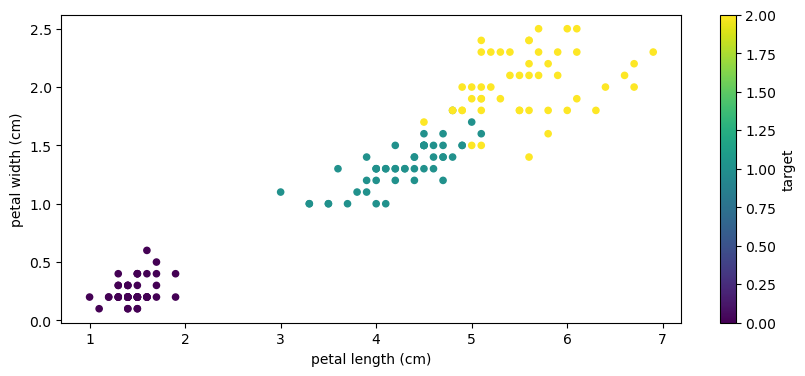

In [161]:
iris=load_iris()
iris_df = load_iris(as_frame=True)
X = iris.data[:, (2, 3)]
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

pd.concat([iris_df.data, iris_df.target], axis=1).plot.scatter(x='petal length (cm)', y='petal width (cm)', c='target',colormap='viridis', figsize=(10,4))

2. Perceptron Iris

In [162]:
accuracies = []
weights = []

for i in range(3):
    y_train_i = np.where(y_train == i, 1, 0)
    y_test_i = np.where(y_test == i, 1, 0)

    per_clf = Perceptron()
    per_clf.fit(X_train, y_train_i)

    acc_train = accuracy_score(y_train_i, per_clf.predict(X_train))
    acc_test = accuracy_score(y_test_i, per_clf.predict(X_test))

    accuracies.append((acc_train, acc_test))

    weights.append((per_clf.intercept_[0], per_clf.coef_[0][0], per_clf.coef_[0][1]))


print(accuracies)
print(weights)
with open('per_acc.pkl', 'wb') as f:
    pickle.dump(accuracies, f)

with open('per_wght.pkl', 'wb') as f:
    pickle.dump(weights, f)

[(1.0, 1.0), (0.6916666666666667, 0.5666666666666667), (0.9666666666666667, 0.9)]
[(3.0, -0.7999999999999996, -1.3), (-9.0, 4.900000000000018, -19.79999999999996), (-43.0, 1.2999999999999758, 24.300000000000026)]


3. Przygotowanie danych XOR

In [169]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

4. Perceptron XOR

In [164]:
per_xor = Perceptron()
per_xor.fit(X, y)

accuracy = accuracy_score(y, per_xor.predict(X))
weight = per_xor.intercept_
print(accuracy, weight)

0.5 [0.]


In [224]:
epochs = 500

mlp_xor = MLPClassifier(hidden_layer_sizes=(2, ), max_iter=epochs, activation='tanh', solver='lbfgs')
mlp_xor.fit(X, y)
print(accuracy_score(y, mlp_xor.predict(X)), mlp_xor.predict(X), mlp_xor.intercepts_)

with open('mlp_xor.pkl', 'wb') as f:
    pickle.dump(mlp_xor, f)

mlp_xor.intercepts_ = [np.array([-1.5, -0.5]), np.array([-0.5])]
print(accuracy_score(y, mlp_xor.predict(X)), mlp_xor.predict(X), mlp_xor.intercepts_)
with open('mlp_xor_fixed.pkl', 'wb') as f:
    pickle.dump(mlp_xor, f)

0.5 [0 1 0 1] [array([-3.34066422, -1.04565401]), array([1.18496074])]
0.75 [0 1 0 0] [array([-1.5, -0.5]), array([-0.5])]


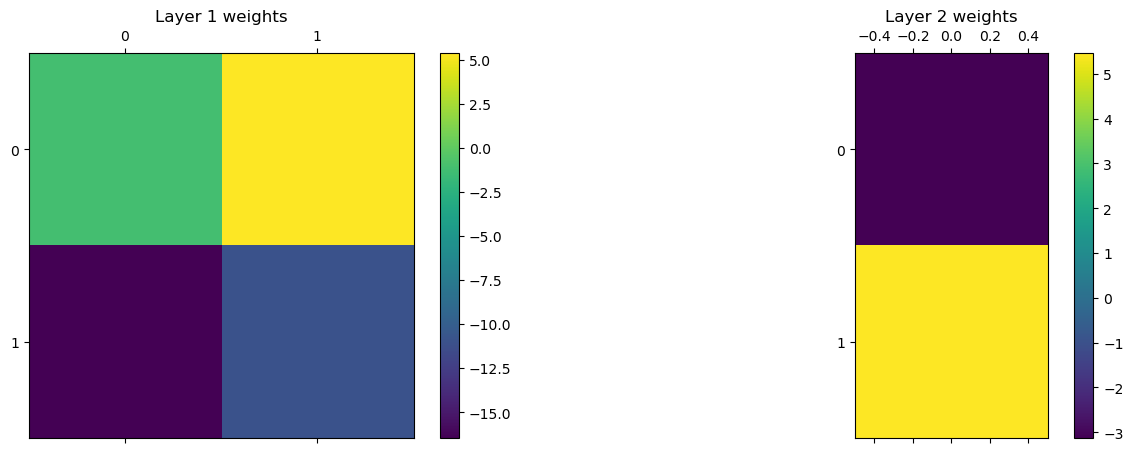

In [203]:
import matplotlib.pyplot as plt

# Assume model has been trained
# model.fit(X, y)

fig, axs = plt.subplots(nrows=1, ncols=len(mlp_xor.coefs_), figsize=(15, 5))

for i, (coef, ax) in enumerate(zip(mlp_xor.coefs_, axs.ravel())):
    cax = ax.matshow(coef, cmap='viridis')
    ax.set_title(f'Layer {i+1} weights')
    fig.colorbar(cax, ax=ax)

plt.show()
